### INTRODUCTION

AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones

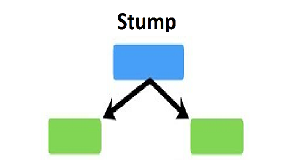

# Importing Libraries

In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np

from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#reading the data
data=pd.read_csv('Loan data cleaned.csv')

In [3]:
#shape of the data
data.shape

(4368, 64)

In [4]:
#first five rows of the data
data.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,...,ploan_additional charges_50%_x,ploan_additional charges_75%_x,ploan_additional charges_max_x,ploan_additional charges_mean_y,ploan_additional charges_min_y,ploan_additional charges_25%_y,ploan_additional charges_50%_y,ploan_additional charges_75%_y,ploan_additional charges_max_y,not_repaid_percentage
0,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,...,3800.000000,4500.000000,4500.000000,3900.000000,3000.000000,3400.000000,3800.000000,4500.000000,4500.000000,64.000000
1,2,15000.0,17250.0,30,Good,Savings,3.885298,7.320700,GT Bank,Permanent,...,2665.558293,3037.525723,3543.851778,2730.359972,2102.661161,2364.738902,2665.558293,3037.525723,3543.851778,63.573297
2,7,20000.0,22250.0,15,Good,Other,11.139350,10.292041,EcoBank,Permanent,...,1500.000000,1500.000000,3000.000000,1750.000000,1500.000000,1500.000000,1500.000000,1500.000000,3000.000000,50.000000
3,3,10000.0,11500.0,15,Good,Savings,3.985770,7.491708,First Bank,Permanent,...,2250.000000,2625.000000,3000.000000,2250.000000,1500.000000,1875.000000,2250.000000,2625.000000,3000.000000,0.000000
4,9,40000.0,44000.0,30,Good,Other,7.457913,9.076574,GT Bank,Permanent,...,3800.000000,5100.000000,9000.000000,4800.000000,3000.000000,3000.000000,3800.000000,5100.000000,9000.000000,100.000000


In [5]:
#checking missing values in the data
data.isnull().sum()

loannumber                        0
loanamount                        0
totaldue                          0
termdays                          0
good_bad_flag                     0
                                 ..
ploan_additional charges_25%_y    0
ploan_additional charges_50%_y    0
ploan_additional charges_75%_y    0
ploan_additional charges_max_y    0
not_repaid_percentage             0
Length: 64, dtype: int64

In [6]:
#make dummies of categorical columns('bank_account_type','bank_name_clients','employment_status_clients')
data=pd.get_dummies(data=data,columns=['bank_account_type','bank_name_clients','employment_status_clients'],drop_first=True)

### Separating independent and dependent variables.

In [7]:
x = data.drop(['good_bad_flag'], axis=1)
y = data['good_bad_flag'].replace({'Good':0, 'Bad':1})

### Creating the train and test dataset

In [8]:
#import the train-test split
from sklearn.model_selection import train_test_split

In [9]:
#divide into train and test sets
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 101, stratify=y)

In [10]:
#Scalig the train and testing datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(train_x)
train_x = pd.DataFrame(x_train_scaled, columns=train_x.columns)

x_test_scaled = scaler.transform(test_x)
test_x = pd.DataFrame(x_test_scaled, columns=test_x.columns)

## Building a Model

In [11]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
#creating an AdaBoost instance
clf = AdaBoostClassifier(random_state=101)

In [13]:
#training the model
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=101)

In [15]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [16]:
f1_train=f1_score(train_y,pred_train)
f1_test=f1_score(test_y,pred_test)

In [17]:
f1_train,f1_test

(0.36218905472636814, 0.30498533724340177)

# Hyperparameter Tuning

1. **base_estimator:** The model to ensemble. Default is decision tree.
2. **n_estimators:** Total number of models to build.
3. **learning_rate:** Shrinks the contribution of each classifier by this value.
4. **random_state:** The random number seed so that same random numbers are generated every time.

### --Default DT

In [12]:
from sklearn.tree import DecisionTreeClassifier as dt

In [14]:
clf = AdaBoostClassifier(random_state=96, base_estimator=dt(max_depth=1,random_state=101),n_estimators=200,learning_rate=0.05)

In [15]:
#training the model
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [16]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [17]:
f1_train=f1_score(train_y,pred_train)
f1_test=f1_score(test_y,pred_test)

In [18]:
f1_train,f1_test

(0.28289473684210525, 0.271523178807947)

### --DT with tuned parameters

In [15]:
from sklearn.tree import DecisionTreeClassifier as dt

In [158]:
clf = AdaBoostClassifier(random_state=96, base_estimator=dt(class_weight='balanced',random_state=101,criterion='gini',max_depth=4,max_leaf_nodes=15,min_samples_split=30),n_estimators=200,learning_rate=0.05)

In [159]:
#training the model
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=15,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=30,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                     

In [160]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [161]:
f1_train=f1_score(train_y,pred_train)
f1_test=f1_score(test_y,pred_test)

In [162]:
f1_train,f1_test

(0.7433628318584071, 0.40080160320641284)

### --Default RF

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
clf = AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=101),n_estimators=200, learning_rate=0.05)

In [22]:
#training the model
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [23]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [24]:
f1_train=f1_score(train_y,pred_train)
f1_test=f1_score(test_y,pred_test)

In [25]:
f1_train,f1_test

(1.0, 0.32628398791540786)

### --Tuned RF

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
clf = AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=96,class_weight='balanced',max_depth=4,max_leaf_nodes=15,min_samples_split=30),
                         n_estimators=200, learning_rate=0.05)

In [165]:
#training the model
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features='auto',
                                                         max_leaf_nodes=15,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=30,
                                     

In [166]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [167]:
f1_train=f1_score(train_y,pred_train)
f1_test=f1_score(test_y,pred_test)

In [168]:
f1_train,f1_test

(0.6215420835785757, 0.428030303030303)

-LR

In [127]:
from sklearn.linear_model import LogisticRegression

In [154]:
clf = AdaBoostClassifier(random_state=96, base_estimator=LogisticRegression(random_state=96,class_weight='balanced'),
                         n_estimators=400, learning_rate=1.0)

In [155]:
#training the model
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0,
                                                     class_weight='balanced',
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=96,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.

In [156]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [157]:
f1_train,f1_test

(0.6215420835785757, 0.428030303030303)

--DT AS base estimator with depth 1

In [16]:
clf = AdaBoostClassifier(random_state=96, base_estimator=dt(class_weight='balanced',random_state=101,criterion='gini',max_depth=1,max_leaf_nodes=15,min_samples_split=30),n_estimators=200,learning_rate=0.05)

In [17]:
#training the model
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=15,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=30,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                     

In [18]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [19]:
f1_train=f1_score(train_y,pred_train)
f1_test=f1_score(test_y,pred_test)

In [20]:
f1_train,f1_test

(0.4817610062893081, 0.4615384615384615)

--RF as a Base Estimator with depth 1

In [16]:
clf = AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=96,class_weight='balanced',max_depth=1,max_leaf_nodes=15,min_samples_split=30),
                         n_estimators=200, learning_rate=0.01)

In [17]:
#training the model
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features='auto',
                                                         max_leaf_nodes=15,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=30,
                                     

In [18]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [19]:
f1_train=f1_score(train_y,pred_train)
f1_test=f1_score(test_y,pred_test)

In [20]:
f1_train,f1_test

(0.4527829893683552, 0.436)